In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import cv2


fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'

Veri seti ve kütüphaneler yüklendi.

In [ ]:

labels = []
paths = []


for dir_name, _, filenames in os.walk(fish_dir):
    if 'GT' not in dir_name:
        for filename in filenames:
            if os.path.splitext(filename)[1] == ".png":
                labels.append(os.path.basename(dir_name))
                paths.append(os.path.join(dir_name, filename))


data = pd.DataFrame({
    'path': paths,
    'label': labels
})

Boş listeler oluşturup,resim yolları ve etiketleri belirlendi.Veri dataframe'e aktarıldı.

In [ ]:

le = LabelEncoder()
data['label_encoded'] = le.fit_transform(data['label'])


images = []
for image_path in data['path']:
    img = cv2.imread(image_path)
    img = cv2.resize(img, (32, 32))  # Resimleri daha küçük boyuta getiriyoruz (32x32)
    images.append(img)


X = np.array(images)
y = np.array(data['label_encoded'])

# Normalize 
X = X / 255.0

# one-hot 
y = to_categorical(y)

Etiketler sayısal veriye dönüştürüldü.Resim ve etiketleri arraya dönüştürülmek için yüklendi.Görüntüleri eğitim için kullanmak yerine, onları veri setinden ayırarak genellikle eğitim veya test verileriyle karışmaması için yapıldı¶

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ANN modeli
model = Sequential()

# Flatten
model.add(Flatten(input_shape=(32, 32, 3)))  # 32x32 boyutlu görüntüleri düzleştiriyoruz

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(len(le.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Görüntüleri kullanabilmek için eğitim ve test olarak ayırdık.Sonrasında oluşturduğumuz modele boyutlandırma işlemi yapıldı.

In [ ]:

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=16)


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test kaybı: {test_loss}")
print(f"Test doğruluğu: {test_accuracy}")


from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

Model eğitimi yapılırken bellek durumuna göre düzenleme yapıldı.Test sonuçları değerlendirildi.Sınıflandırma raporu ve karışıklık matrisi oluşturuldu.

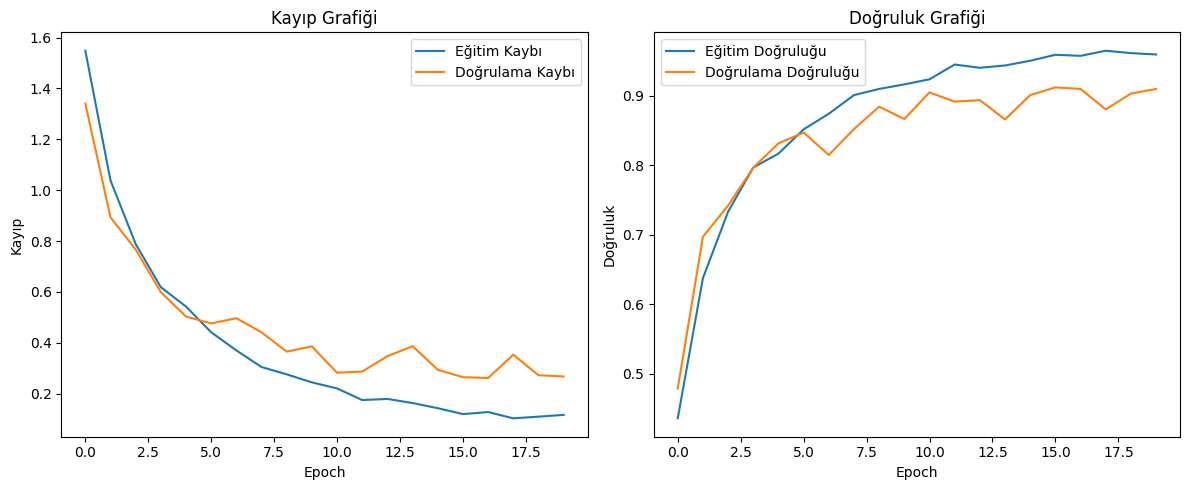

In [2]:
import matplotlib.pyplot as plt
# Kayıp ve doğruluk grafiklerini çizme
plt.figure(figsize=(12, 5))

# Kayıp grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

# Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.tight_layout()
plt.show()

Kayıp ve doğruluk grafikleri ile değerlendirme yapıldı.

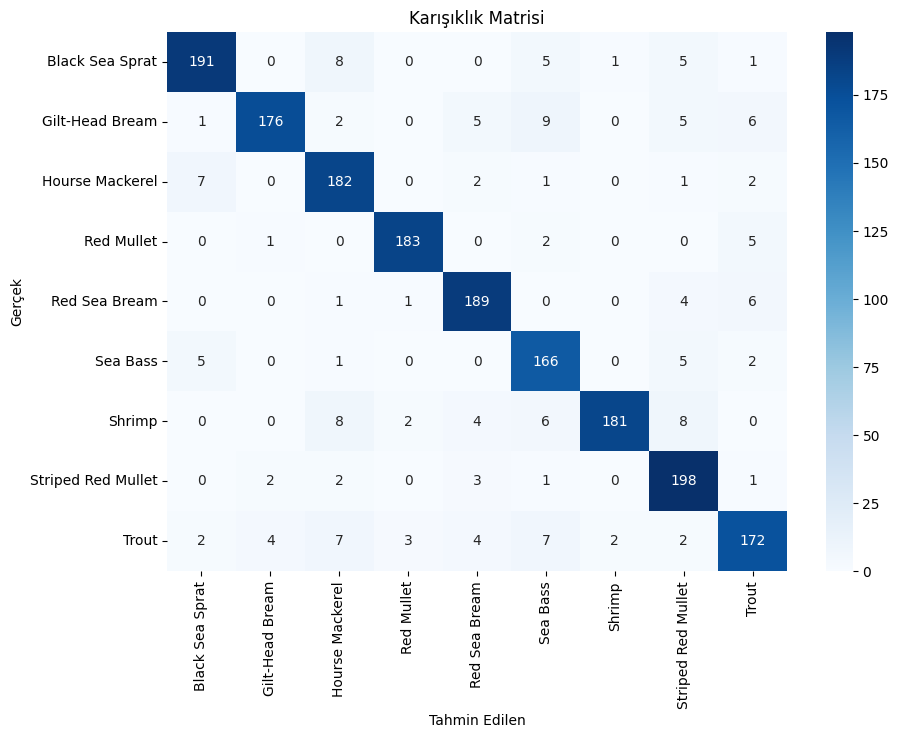

In [3]:

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

Karışıklık matrisi görselleştirildi.